####  Data ingestion

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


Loading Data 

In [3]:
url = 'https://raw.githubusercontent.com/cheryvmak/Dataset-Repo/refs/heads/main/Data_files/home_loan_train.csv'
train_data = pd.read_csv(url)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Preliminary Data Analysis (EDA)

In [5]:
# copy and Read in data
df1 = train_data.copy()

# Inspect dataset
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Lets check our data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Lets take a snap shot of our data
print(f"Rows: {df1.shape[0]:,}")
print(f"Columns: {df1.shape[1]}")

Rows: 614
Columns: 13


In [21]:
#Just an identifier — adds no predictive value.
df1 = df1.drop(columns=['Loan_ID'])
df1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [22]:
df1.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [23]:
# Lets check our datatypes
df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [18]:
#df1.describe().T

In [14]:
#df1.duplicated().sum()

In [15]:
#df1.head(2)

In [26]:
# Lets check for missing values
missing = df1.isnull().sum()
missing_percent = (missing / len(df1)) * 100

# Keep only columns with missing values
missing = missing[missing > 0]
missing_percent = missing_percent[missing_percent > 0]

# Combine and format with "%" symbol
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percent.map("{:.2f}%".format)
}).sort_values(by='Missing Count', ascending=False)

print(missing_table)

                  Missing Count Missing Percentage
Credit_History               50              8.14%
Self_Employed                32              5.21%
LoanAmount                   22              3.58%
Dependents                   15              2.44%
Loan_Amount_Term             14              2.28%
Gender                       13              2.12%
Married                       3              0.49%


In [27]:
def check_unique_values(df):
    """
    Prints the number of unique values and the unique entries
    for each column in the DataFrame.
    """
    for col in df1.select_dtypes(include='object'):
        unique_vals = df1[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique count: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")

In [28]:
check_unique_values(df1)


Column: Gender
Unique count: 3
Unique values: ['Male' 'Female' nan]

Column: Married
Unique count: 3
Unique values: ['No' 'Yes' nan]

Column: Dependents
Unique count: 5
Unique values: ['0' '1' '2' '3+' nan]

Column: Education
Unique count: 2
Unique values: ['Graduate' 'Not Graduate']

Column: Self_Employed
Unique count: 3
Unique values: ['No' 'Yes' nan]

Column: Property_Area
Unique count: 3
Unique values: ['Urban' 'Rural' 'Semiurban']

Column: Loan_Status
Unique count: 2
Unique values: ['Y' 'N']


In [29]:
def clean_loan_data(df1):
    # fill missing values
    for col in df1.select_dtypes(include='object'):
        df1[col].fillna(df1[col].mode()[0], inplace=True)
    for col in df1.select_dtypes(include=['int64', 'float64']):
        df1[col].fillna(df1[col].median(), inplace=True)

    # type conversions
    for col in df1.select_dtypes(include='object'):
        df1[col] = df1[col].astype('category')
        df1[col] = df1[col].str.strip().str.lower()


    return df1

In [30]:
df1_cleaned = clean_loan_data(df1)
df1_cleaned.isna().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_9000\3130218261.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(df1[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9000\3130218261.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
# Replace '3+' with a number
df1_cleaned['Dependents'] = df1_cleaned['Dependents'].replace('3+', '3')
# Convert the column to numeric
df1_cleaned['Dependents'] = df1_cleaned['Dependents'].astype(int)


df1_cleaned['Loan_Amount_Term'] = df1_cleaned['Loan_Amount_Term'].astype(int)

In [62]:

# def cap_outliers(df1_cleaned):
#     """
#     Caps outliers for specific features based on their type and business logic.
#     Reports number and percentage of outliers before capping.
#     """

#     df1_cleaned = df1_cleaned.copy()

#     # Function to count outliers using IQR rule
#     def count_outliers(series):
#         Q1 = series.quantile(0.25)
#         Q3 = series.quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         outliers = series[(series < lower_bound) | (series > upper_bound)]
#         return len(outliers), 100 * len(outliers) / len(series)

#     # Percentile-based capping function
#     def cap_percentile(series, lower=0.01, upper=0.99):
#         lower_cap = series.quantile(lower)
#         upper_cap = series.quantile(upper)
#         return np.clip(series, lower_cap, upper_cap)

#     # IQR-based capping function
#     def cap_iqr(series):
#         Q1 = series.quantile(0.25)
#         Q3 = series.quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         return np.clip(series, lower_bound, upper_bound)

#     # ---- Apply Feature-Specific Logic ----
#     numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#     for feature in numeric_features:
#         if feature in df1_cleaned.columns:
#             n_outliers, pct_outliers = count_outliers(df1_cleaned[feature])
#             print(f"\nFeature: {feature}")
#             print(f" Number of outliers: {n_outliers}")
#             print(f" Outlier percentage: {pct_outliers:.2f}%")

#             if feature in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
#                 df1_cleaned[feature] = cap_percentile(df1_cleaned[feature])
#                 print(f"Applied percentile capping (1st–99th percentile).")
#             elif feature == 'Loan_Amount_Term':
#                 df1_cleaned[feature] = cap_iqr(df1_cleaned[feature])
#                 print(f"Applied IQR-based capping.")
    
#     # Skip categorical/binary
#     skip_features = ['Dependents', 'Credit_History']
#     print(f"\nSkipped features (categorical/binary): {skip_features}")
#     print("\nOutlier capping completed successfully.\n")

#     return df1_cleaned


In [32]:
df1_cleaned['Loan_Amount_Term'].unique()

array([360, 120, 240, 180,  60, 300, 480,  36,  84,  12])

In [64]:
# df_capped = cap_outliers(df1_cleaned)


In [33]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 57.7+ KB


In [65]:
# df_capped.info()

In [34]:
# Prints and returns all numerical columns in the DataFrame.
numerical_features = df1_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Features:\n{numerical_features}")

Numerical Features:
['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [35]:
def univariate_numerical_eda(df1_cleaned, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, boxplot, 
    and intelligent suggestions for skew/kurtosis handling (for ML preprocessing).
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    print(f"\nFeature: {column}")
    print("="*45)
    print(df1_cleaned[column].describe().to_frame())

    # --- Summary ---
    total = len(df1_cleaned[column])
    missing = df1_cleaned[column].isna().sum()
    unique = df1_cleaned[column].nunique()
    

  
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
   
    
    skew = df1_cleaned[column].skew()
    kurt = df1_cleaned[column].kurt()
    
    print(f"\nSkewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")

     # ====== INTERPRETATION (Stricter ML-based) ======

    # --- Skewness interpretation ---
    
    if abs(skew) > 0.7:
        skew_status = "high"
        print(f"\n{column} is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.")
    elif abs(skew) > 0.3:
        skew_status = "moderate"
        print(f"{column} is mildly skewed. A mild transformation (√ or cube root) may help.")
    else:
        skew_status = "normal"
        print(f"{column} is fairly symmetric — no transformation likely needed.")

    # --- Kurtosis interpretation ---
    if abs(kurt) > 1.0:
        kurt_status = "high"
        print(f"{column} shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.")
    elif abs(kurt) > 0.5:
        kurt_status = "moderate"
        print(f"{column} has mildly heavy tails. Light transformation or scaling may help.")
    else:
        kurt_status = "normal"
        print(f"{column} has fairly normal kurtosis — suitable for most ML models.")

    # ====== COMBINED LOGIC ======
    if (skew_status in ["high", "moderate"]) and kurt_status == "normal":
        print("\n You can focus on correcting the skew only (e.g., log-transform), "
              "no need for outlier-heavy corrections.")
    elif (skew_status in ["high", "moderate"]) and (kurt_status in ["high", "moderate"]):
        print("\n The variable is both skewed and heavy-tailed. Consider both transformation "
              "and outlier treatment.")
    elif skew_status == "normal" and kurt_status == "normal":
        print("\n The variable is approximately normal — no transformation needed.")

    # ====== PLOTS ======
    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df1_cleaned[column], kde=True, bins=30, color='salmon')
    plt.title(f'\nDistribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df1_cleaned[column], color='seagreen')
    plt.title(f'\nBoxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()



Feature: Dependents
       Dependents
count  614.000000
mean     0.744300
std      1.009623
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      3.000000
Missing values: 0 (0.00%)
Unique categories: 4

Skewness: 1.016
Kurtosis: -0.347

Dependents is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Dependents has fairly normal kurtosis — suitable for most ML models.

 You can focus on correcting the skew only (e.g., log-transform), no need for outlier-heavy corrections.


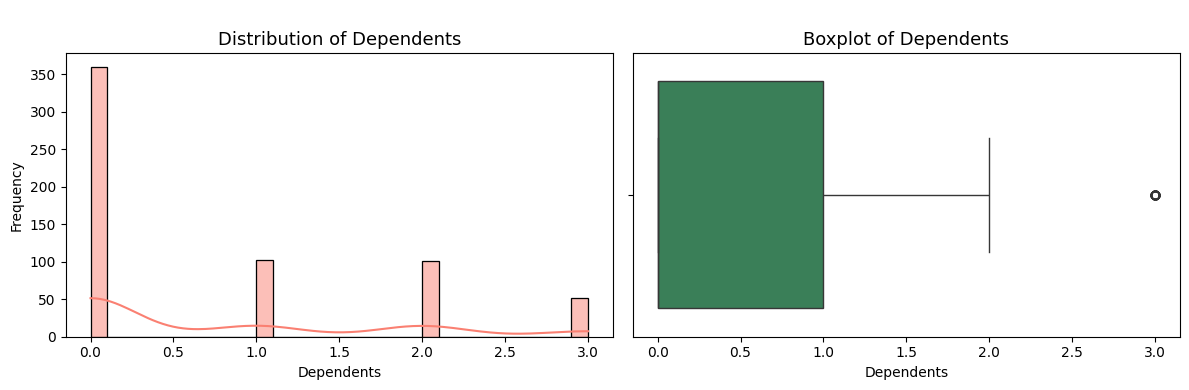


Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000
Missing values: 0 (0.00%)
Unique categories: 505

Skewness: 6.540
Kurtosis: 60.541

ApplicantIncome is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
ApplicantIncome shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


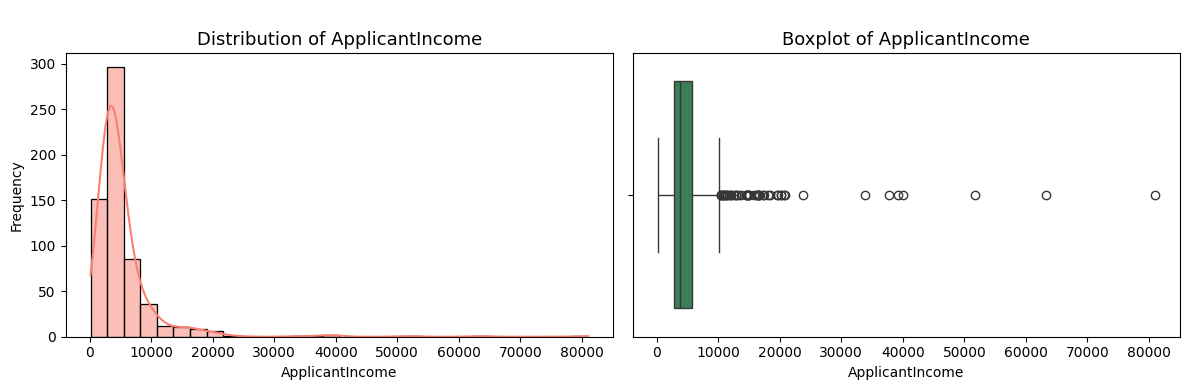


Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000
Missing values: 0 (0.00%)
Unique categories: 287

Skewness: 7.492
Kurtosis: 84.956

CoapplicantIncome is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
CoapplicantIncome shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


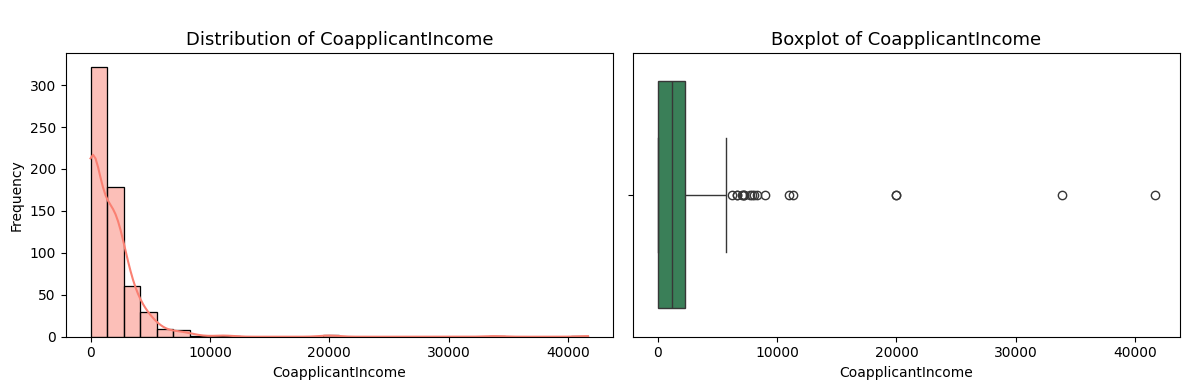


Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000
Missing values: 0 (0.00%)
Unique categories: 203

Skewness: 2.743
Kurtosis: 10.937

LoanAmount is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
LoanAmount shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


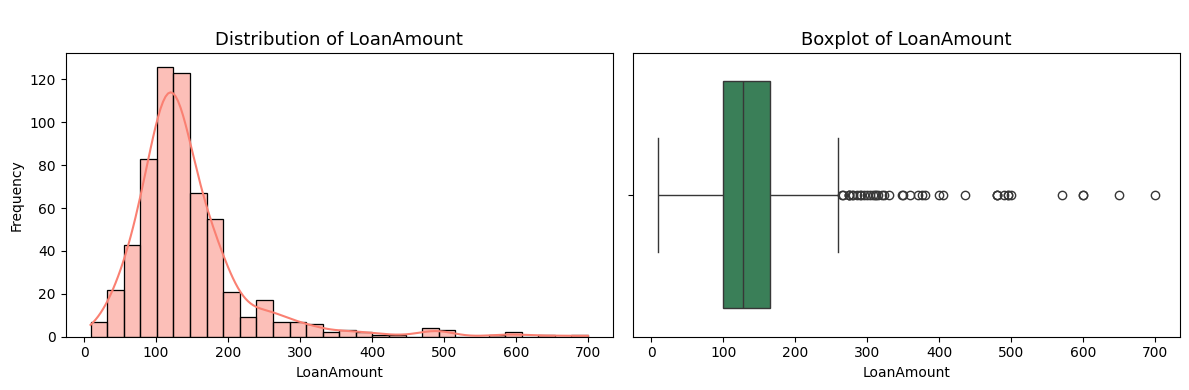


Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000
Missing values: 0 (0.00%)
Unique categories: 10

Skewness: -2.402
Kurtosis: 6.925

Loan_Amount_Term is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Loan_Amount_Term shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


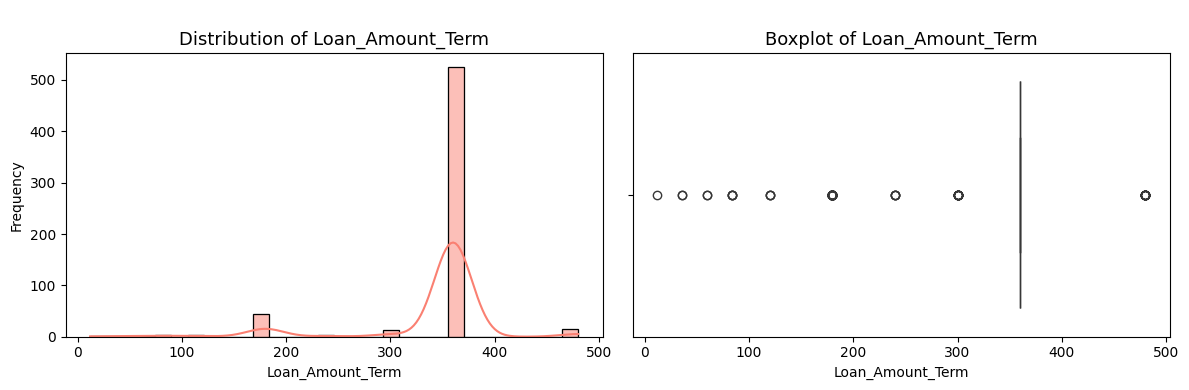


Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Missing values: 0 (0.00%)
Unique categories: 2

Skewness: -2.022
Kurtosis: 2.095

Credit_History is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Credit_History shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


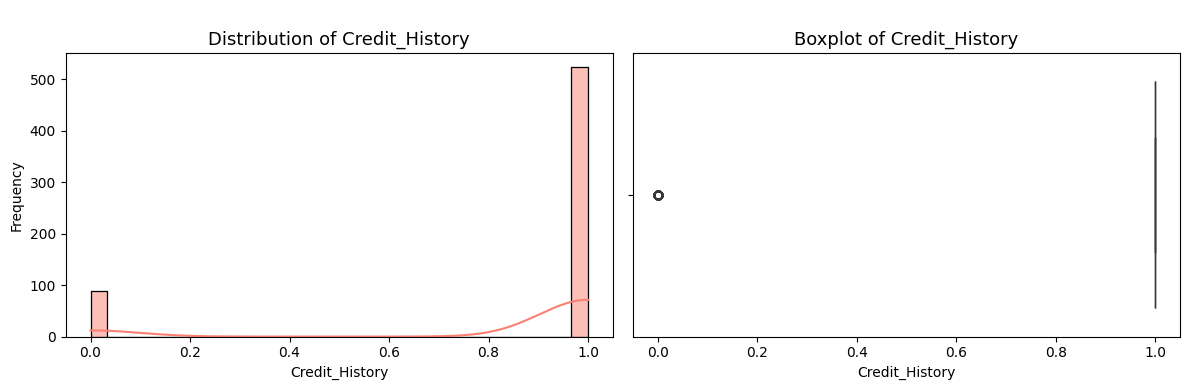

In [36]:
# We can loop to save time
for col in numerical_features:
    univariate_numerical_eda(df1_cleaned, col)

In [37]:
# from sklearn.preprocessing import PowerTransformer
# import numpy as np
# import pandas as pd

# def transform_features(df1_cleaned, columns, method='yeo-johnson'):
#     """
#     Applies log, Box-Cox, or Yeo-Johnson transformation to specified columns.
#     Handles zero or negative values safely and skips near-binary variables.

#     Parameters:
#     - df1_transformed: pandas DataFrame
#     - columns: list of columns to transform
#     - method: 'log', 'boxcox', or 'yeo-johnson'
    
#     Returns:
#     - Transformed DataFrame
#     """
#     df1_cleaned = df1_cleaned.copy()

#     for col in columns:
#         if col not in df1_cleaned.columns:
#             print(f"Column '{col}' not found. Skipping.")
#             continue

#         unique_vals = df1_cleaned[col].nunique()

#         # Skip near-binary or categorical numeric features
#         if unique_vals <= 4:
#             print(f"Skipping transformation for '{col}' (only {unique_vals} unique values).")
#             continue

#         series = df1_cleaned[col]  # ignore NaNs temporarily
#         before_skew = series.skew()

#         # ---- LOG TRANSFORMATION ----
#         if method == 'log':
#             if (series <= 0).any():
#                 shift = abs(series.min()) + 1
#                 df1_cleaned[col] = np.log1p(df1_cleaned[col] + shift)
#                 print(f"Applied log1p (shift={shift:.2f}) to '{col}'")
#             else:
#                 df1_cleaned[col] = np.log1p(df1_cleaned[col])
#                 print(f"Applied log1p to '{col}'")

#         # ---- BOX-COX or YEO–JOHNSON ----
#         elif method in ['boxcox', 'yeo-johnson']:
#             transformer = PowerTransformer(method=method, standardize=False)
#             reshaped = df1_cleaned[col].values.reshape(-1, 1)

#             # Skip Box–Cox if non-positive values exist
#             if method == 'boxcox' and (df1_cleaned[col] <= 0).any():
#                 print(f"Skipping Box–Cox for '{col}' (contains non-positive values).")
#                 continue

#             try:
#                 df1_cleaned[col] = transformer.fit_transform(reshaped)
#                 after_skew = df1_cleaned[col].skew()
#                 print(f"Applied {method.title()} to '{col}' | Before Skew: {before_skew:.4f}, After: {after_skew:.4f}")
#             except Exception as e:
#                 print(f"Could not apply {method.title()} to '{col}': {e}")

#         else:
#             print(f"Unknown method '{method}'. Choose from ['log', 'boxcox', 'yeo-johnson']")

#     print("\nTransformation completed successfully.\n")
#     return df1_cleaned


In [38]:
#df1_transformed = transform_features(df1_cleaned, numerical_features, method='yeo-johnson')

In [40]:
# transform_features = ['ApplicantIncome', 'CoapplicantIncome', 
#                 'LoanAmount', 'Loan_Amount_Term']

In [41]:
# df1_transformed[transform_features].skew()


In [42]:
def univariate_categorical_eda(df1_cleaned, column):
    """
    Performs univariate EDA on a single categorical column.
    Displays frequency distribution, proportion, missing values,
    and visualizations (bar plot + pie chart).
    Provides ML preprocessing suggestions.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd

    print(f"\nFeature: {column}")
    print("="*45)

    # --- Summary ---
    total = len(df1_cleaned[column])
    missing = df1_cleaned[column].isna().sum()
    unique = df1_cleaned[column].nunique()
    mode_val = df1_cleaned[column].mode()[0] if unique > 0 else None

    print(f"Total observations: {total}")
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
    print(f"Most frequent category: {mode_val}")

    # --- Frequency Table ---
    freq = df1_cleaned[column].value_counts(dropna=False)
    perc = df1_cleaned[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': perc.round(2)})
    print("\nCategory Distribution:")
    print(summary)

    # --- Visualization ---
    plt.figure(figsize=(12,4))

    # Bar Plot
    plt.subplot(1,2,1)
    sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')
    plt.title(f"Frequency of {column}", fontsize=13)
    plt.xticks(rotation=30, ha='right')
    

    # Pie Chart
    plt.subplot(1,2,2)
    plt.pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Proportion of {column}", fontsize=13)

    plt.tight_layout()
    plt.show()

    # --- ML Preprocessing Suggestions ---
    if unique == 2:
        print(f" {column} is binary — suitable for Label Encoding (0/1).")
    elif 2 < unique <= 10:
        print(f" {column} has moderate categories — use One-Hot Encoding.")
    elif unique > 10:
        print(f"{column} has many unique categories — consider frequency encoding or feature grouping.")
    else:
        print(f"{column} seems low cardinality — standard encoding should work fine.")

    if (missing / total) > 0.05:
        print(f" Missing values exceed 5% — consider imputing or flagging missingness.")


In [43]:
# Prints and returns all categorical columns in the DataFrame.
categorical_features = df1_cleaned.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features:\n{categorical_features}")


Categorical Features:
['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']



Feature: Gender
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: male

Category Distribution:
        Count  Percentage
Gender                   
male      502       81.76
female    112       18.24


C:\Users\USER\AppData\Local\Temp\ipykernel_9000\4154878159.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')


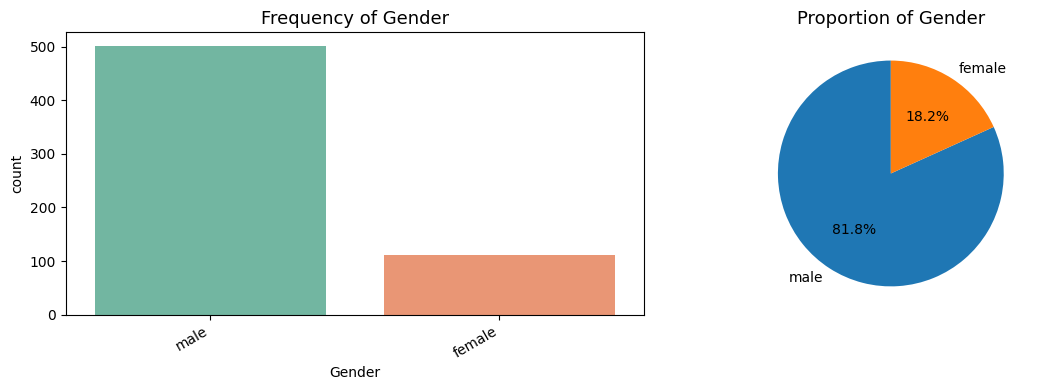

 Gender is binary — suitable for Label Encoding (0/1).

Feature: Married
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: yes

Category Distribution:
         Count  Percentage
Married                   
yes        401       65.31
no         213       34.69


C:\Users\USER\AppData\Local\Temp\ipykernel_9000\4154878159.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')


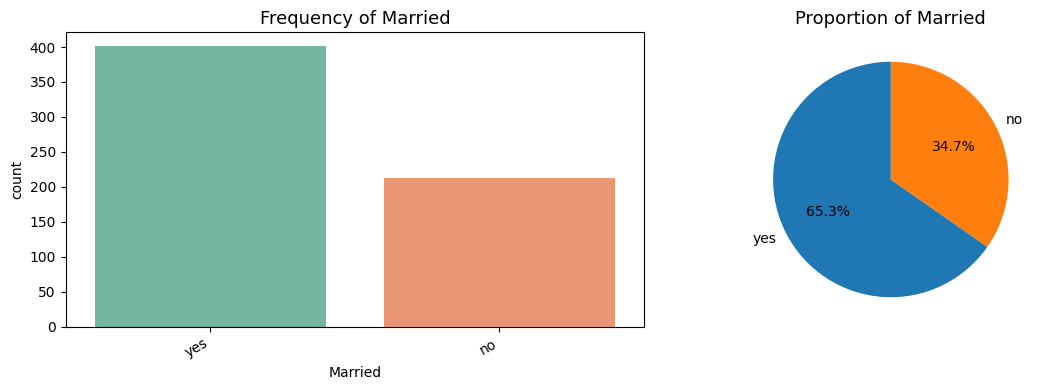

 Married is binary — suitable for Label Encoding (0/1).

Feature: Education
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: graduate

Category Distribution:
              Count  Percentage
Education                      
graduate        480       78.18
not graduate    134       21.82


C:\Users\USER\AppData\Local\Temp\ipykernel_9000\4154878159.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')


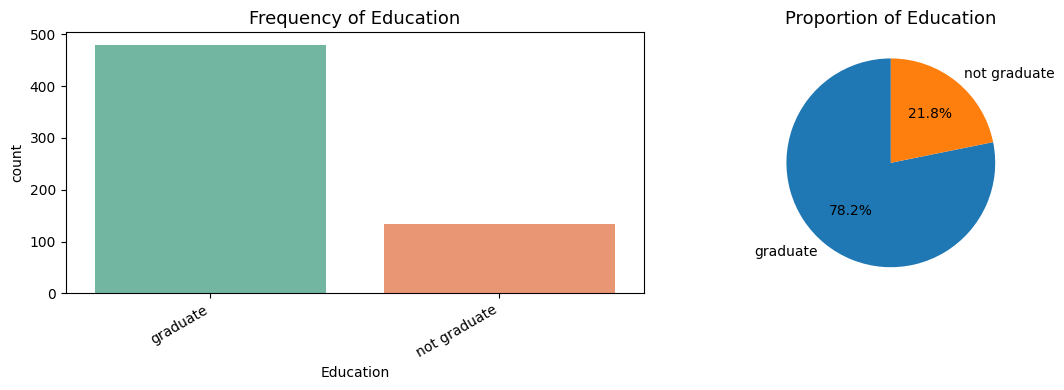

 Education is binary — suitable for Label Encoding (0/1).

Feature: Self_Employed
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: no

Category Distribution:
               Count  Percentage
Self_Employed                   
no               532       86.64
yes               82       13.36


C:\Users\USER\AppData\Local\Temp\ipykernel_9000\4154878159.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')


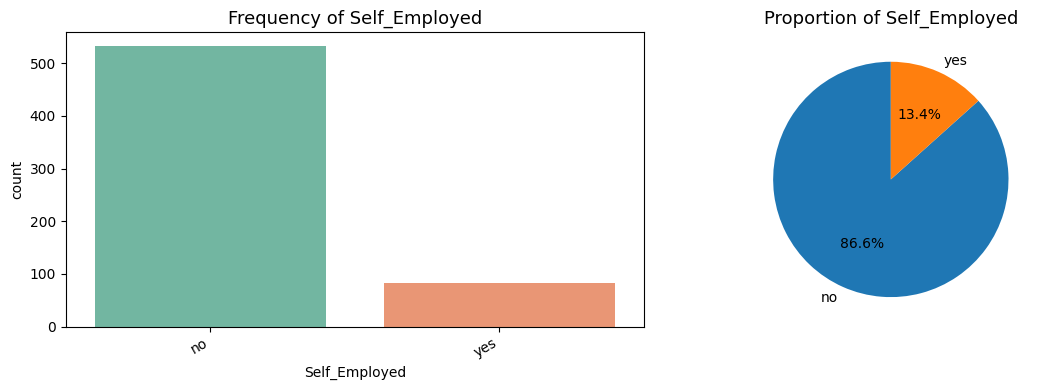

 Self_Employed is binary — suitable for Label Encoding (0/1).

Feature: Property_Area
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 3
Most frequent category: semiurban

Category Distribution:
               Count  Percentage
Property_Area                   
semiurban        233       37.95
urban            202       32.90
rural            179       29.15


C:\Users\USER\AppData\Local\Temp\ipykernel_9000\4154878159.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')


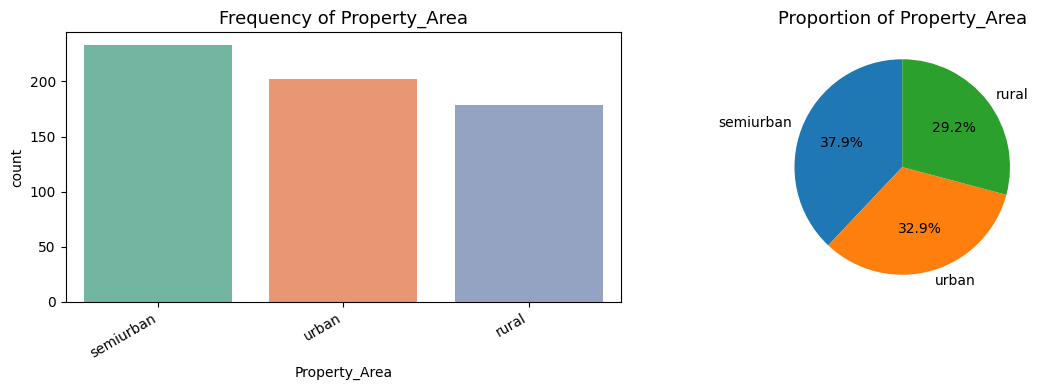

 Property_Area has moderate categories — use One-Hot Encoding.

Feature: Loan_Status
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: y

Category Distribution:
             Count  Percentage
Loan_Status                   
y              422       68.73
n              192       31.27


C:\Users\USER\AppData\Local\Temp\ipykernel_9000\4154878159.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='teal')


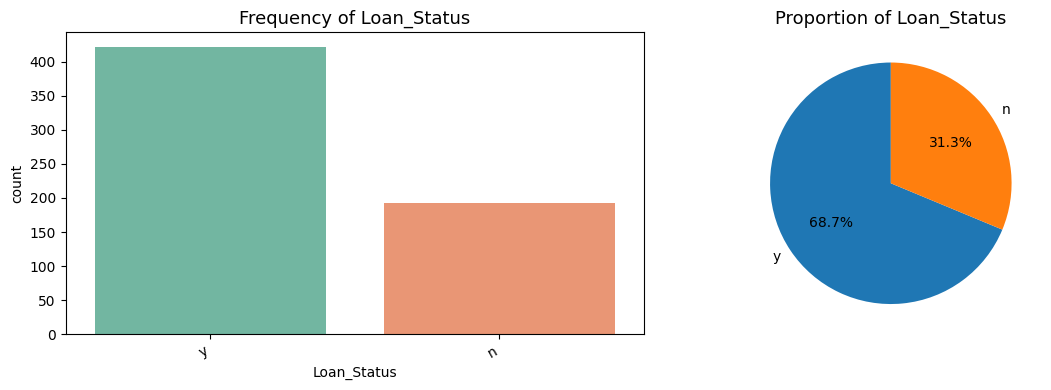

 Loan_Status is binary — suitable for Label Encoding (0/1).


In [44]:
# We can loop to save time
for col in categorical_features:
    univariate_categorical_eda(df1_cleaned, col)

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

1. Numeric to Numeric

Correlation with target

In [45]:
check_unique_values(df1_cleaned)


Column: Gender
Unique count: 2
Unique values: ['male' 'female']

Column: Married
Unique count: 2
Unique values: ['no' 'yes']

Column: Education
Unique count: 2
Unique values: ['graduate' 'not graduate']

Column: Self_Employed
Unique count: 2
Unique values: ['no' 'yes']

Column: Property_Area
Unique count: 3
Unique values: ['urban' 'rural' 'semiurban']

Column: Loan_Status
Unique count: 2
Unique values: ['y' 'n']


In [46]:
# Label encoding based on logical binary mapping
df1_cleaned['Gender'] = df1_cleaned['Gender'].map({'male': 1, 'female': 0})
df1_cleaned['Married'] = df1_cleaned['Married'].map({'yes': 1, 'no': 0})
df1_cleaned['Education'] = df1_cleaned['Education'].map({'graduate': 1, 'not graduate': 0})
df1_cleaned['Self_Employed'] = df1_cleaned['Self_Employed'].map({'yes': 1, 'no': 0})
df1_cleaned['Loan_Status'] = df1_cleaned['Loan_Status'].map({'y': 1, 'n': 0})

# One-hot encode Property_Area
df1_cleaned = pd.get_dummies(df1_cleaned, columns=['Property_Area'], prefix='Property', drop_first=False, dtype=int)

df1_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_rural,Property_semiurban,Property_urban
0,1,0,0,1,0,5849,0.0,128.0,360,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360,1.0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.0,360,1.0,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360,1.0,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360,1.0,1,1,0,0
610,1,1,3,1,0,4106,0.0,40.0,180,1.0,1,1,0,0
611,1,1,1,1,0,8072,240.0,253.0,360,1.0,1,0,0,1
612,1,1,2,1,0,7583,0.0,187.0,360,1.0,1,0,0,1


In [47]:
df1_cleaned.isna().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Loan_Status           0
Property_rural        0
Property_semiurban    0
Property_urban        0
dtype: int64

In [ ]:
# def map_Loan_status(x):
#     if x == 'y':
#         return 1
#     elif x == 'n':
#         return 0
#     else:
#         return 'Missing record'

# # lets apply our function
# df1_cleaned['Loan_Status'] = df1_cleaned['Loan_Status'].apply(map_Loan_status)

In [48]:
# Lets find the numerical features
num_features = df1_cleaned.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df1_cleaned[num_features])
num_features.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_rural,Property_semiurban,Property_urban
0,1,0,0,1,0,5849,0.0,128.0,360,1.0,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360,1.0,0,1,0,0


In [50]:
def correlation_with_target(df1_cleaned, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    #numeric_df = df1.select_dtypes(include='number').copy()
    #numeric_df = df1.select_dtypes(include=['int64', 'float64']).columns
    #num_features
    if target_col not in num_features.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = num_features.corrwith(num_features[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)


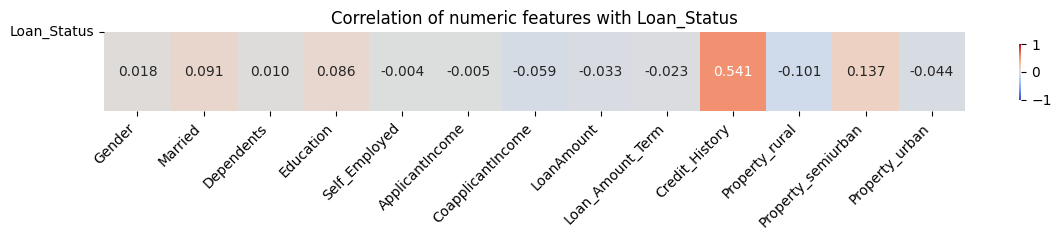

Credit_History        0.540556
Property_semiurban    0.136540
Property_rural       -0.100694
Married               0.091478
Education             0.085884
CoapplicantIncome    -0.059187
Property_urban       -0.043621
LoanAmount           -0.033214
Loan_Amount_Term     -0.022549
Gender                0.017987
Dependents            0.010118
ApplicantIncome      -0.004710
Self_Employed        -0.003700
dtype: float64


In [51]:
corr_series = correlation_with_target(df1_cleaned, 'Loan_Status', figsize=(12,2.5))
print(corr_series) 


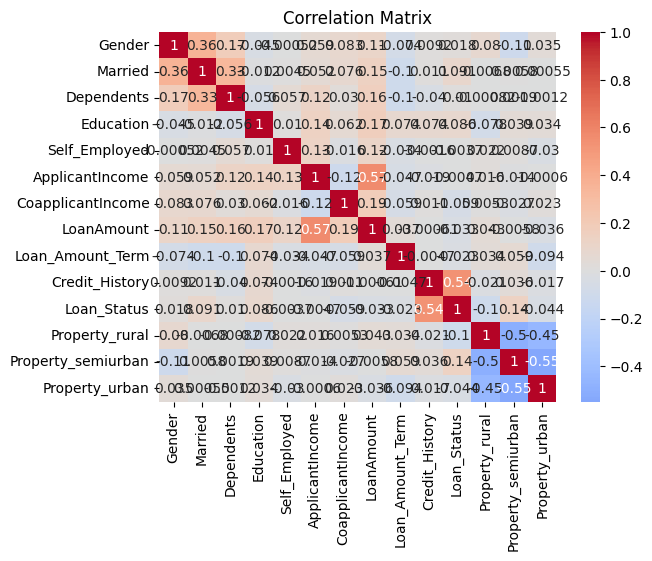

In [52]:
corr = num_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


In [53]:
encoded_property_cols = [col for col in df1_cleaned.columns if col.startswith('Property_')]

for col in categorical_features:
    if col != 'Property_Area':
        ct = pd.crosstab(df1_cleaned[col], df1_cleaned['Loan_Status'], normalize='index') * 100
        print(f"\n{col} vs Loan Status:\n", ct.round(1))
    else:
        for prop_col in encoded_property_cols:
            ct = pd.crosstab(df1_cleaned[prop_col], df1_cleaned['Loan_Status'], normalize='index') * 100
            print(f"\n{prop_col} vs Loan Status:\n", ct.round(1))



Gender vs Loan Status:
 Loan_Status     0     1
Gender                 
0            33.0  67.0
1            30.9  69.1

Married vs Loan Status:
 Loan_Status     0     1
Married                
0            37.1  62.9
1            28.2  71.8

Education vs Loan Status:
 Loan_Status     0     1
Education              
0            38.8  61.2
1            29.2  70.8

Self_Employed vs Loan Status:
 Loan_Status       0     1
Self_Employed            
0              31.2  68.8
1              31.7  68.3

Property_rural vs Loan Status:
 Loan_Status        0     1
Property_rural            
0               28.3  71.7
1               38.5  61.5

Property_semiurban vs Loan Status:
 Loan_Status            0     1
Property_semiurban            
0                   36.2  63.8
1                   23.2  76.8

Property_urban vs Loan Status:
 Loan_Status        0     1
Property_urban            
0               29.9  70.1
1               34.2  65.8

Loan_Status vs Loan Status:
 Loan_Status      0      